In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

pd.options.display.float_format = "{:.3f}".format
pd.set_option('display.max_columns',100)

from matplotlib import rcParams
rcParams['figure.figsize'] = 15,6
sns.set(style='white')

## Funkcje

In [2]:
def counts_pct(category,data):
    '''Funkcja, która zwraca dla tanej kategori liczbe wartości, oraz wartość procentową'''
    base = data[category].value_counts()
    pct = base/data[category].shape[0] * 100
    joined = pd.concat([base,pct],axis=1)
    joined.columns = [str(category),str(category) + ' %']
    return joined

def education(x):
    if x == 1: return 'graduate school'
    elif x == 2: return 'university'
    elif x == 3: return 'high school'
    else: return 'others'

def annotate(ax,s="%.2f",suffix=''):
    for p in ax.patches:
        ax.annotate(s % p.get_height() + suffix, 
                 (p.get_x() + p.get_width() / 2,
                  p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
      
def despine(rot=0):
    sns.despine(left=True)
    plt.xticks(rotation = rot);
    plt.xlabel('');
    plt.ylabel('');
    
def cross_pct(c1, c2):
    cross = pd.crosstab(data[c1], data[c2])
    cross['DEFAULT %'] = cross[1]/(cross[0]+cross[1]) * 100 
    return cross

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data = data.rename(columns={'default.payment.next.month': 'DEFAULT'})
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.000,2,2,1,24,2,2,-1,-1,-2,-2,3913.000,3102.000,689.000,0.000,0.000,0.000,0.000,689.000,0.000,0.000,0.000,0.000,1
1,2,120000.000,2,2,2,26,-1,2,0,0,0,2,2682.000,1725.000,2682.000,3272.000,3455.000,3261.000,0.000,1000.000,1000.000,1000.000,0.000,2000.000,1
2,3,90000.000,2,2,2,34,0,0,0,0,0,0,29239.000,14027.000,13559.000,14331.000,14948.000,15549.000,1518.000,1500.000,1000.000,1000.000,1000.000,5000.000,0
3,4,50000.000,2,2,1,37,0,0,0,0,0,0,46990.000,48233.000,49291.000,28314.000,28959.000,29547.000,2000.000,2019.000,1200.000,1100.000,1069.000,1000.000,0
4,5,50000.000,1,2,1,57,-1,0,-1,0,0,0,8617.000,5670.000,35835.000,20940.000,19146.000,19131.000,2000.000,36681.000,10000.000,9000.000,689.000,679.000,0


## Dataset Information
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

### There are 25 variables:

__ID:__  ID of each client   
__LIMIT_BAL:__  Amount of given credit in NT dollars (includes individual and family/supplementary credit   
__SEX:__  Gender (1=male, 2=female)   
__EDUCATION:__  (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)   
__MARRIAGE:__  Marital status (1=married, 2=single, 3=others)   
__AGE:__  Age in years  
__PAY_0:__  Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months..  
__PAY_2:__  Repayment status in August, 2005 (scale same as above)     
__PAY_3:__ Repayment status in July, 2005 (scale same as above)     
__PAY_4:__ Repayment status in June, 2005 (scale same as above)     
__PAY_5:__ Repayment status in May, 2005 (scale same as above)     
__PAY_6:__ Repayment status in April, 2005 (scale same as above)     
__BILL_AMT1:__ Amount of bill statement in September, 2005 (NT dollar)   
__BILL_AMT2:__ Amount of bill statement in August, 2005 (NT dollar)   
__BILL_AMT3:__ Amount of bill statement in July, 2005 (NT dollar)   
__BILL_AMT4:__ Amount of bill statement in June, 2005 (NT dollar)  
__BILL_AMT5:__ Amount of bill statement in May, 2005 (NT dollar)  
__BILL_AMT6:__ Amount of bill statement in April, 2005 (NT dollar)  
__PAY_AMT1:__ Amount of previous payment in September, 2005 (NT dollar)  
__PAY_AMT2:__ Amount of previous payment in August, 2005 (NT dollar)  
__PAY_AMT3:__ Amount of previous payment in July, 2005 (NT dollar)  
__PAY_AMT4:__ Amount of previous payment in June, 2005 (NT dollar)  
__PAY_AMT5:__ Amount of previous payment in May, 2005 (NT dollar)  
__PAY_AMT6:__ Amount of previous payment in April, 2005 (NT dollar)  
__DEFAULT:__ Default payment in next month (1=yes, 0=no)  

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null float64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null float64
BILL_AMT2    30000 non-null float64
BILL_AMT3    30000 non-null float64
BILL_AMT4    30000 non-null float64
BILL_AMT5    30000 non-null float64
BILL_AMT6    30000 non-null float64
PAY_AMT1     30000 non-null float64
PAY_AMT2     30000 non-null float64
PAY_AMT3     30000 non-null float64
PAY_AMT4     30000 non-null float64
PAY_AMT5     30000 non-null float64
PAY_AMT6     30000 non-null float64
DEFAULT      30000 non-null int64
dtypes: float64

In [6]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000
mean,15000.500,167484.323,1.604,1.853,1.552,35.486,-0.017,-0.134,-0.166,-0.221,-0.266,-0.291,51223.331,49179.075,47013.155,43262.949,40311.401,38871.760,5663.581,5921.163,5225.681,4826.077,4799.388,5215.503,0.221
std,8660.398,129747.662,0.489,0.790,0.522,9.218,1.124,1.197,1.197,1.169,1.133,1.150,73635.861,71173.769,69349.387,64332.856,60797.156,59554.108,16563.280,23040.870,17606.961,15666.160,15278.306,17777.466,0.415
min,1.000,10000.000,1.000,0.000,0.000,21.000,-2.000,-2.000,-2.000,-2.000,-2.000,-2.000,-165580.000,-69777.000,-157264.000,-170000.000,-81334.000,-339603.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,7500.750,50000.000,1.000,1.000,1.000,28.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,3558.750,2984.750,2666.250,2326.750,1763.000,1256.000,1000.000,833.000,390.000,296.000,252.500,117.750,0.000
50%,15000.500,140000.000,2.000,2.000,2.000,34.000,0.000,0.000,0.000,0.000,0.000,0.000,22381.500,21200.000,20088.500,19052.000,18104.500,17071.000,2100.000,2009.000,1800.000,1500.000,1500.000,1500.000,0.000
75%,22500.250,240000.000,2.000,2.000,2.000,41.000,0.000,0.000,0.000,0.000,0.000,0.000,67091.000,64006.250,60164.750,54506.000,50190.500,49198.250,5006.000,5000.000,4505.000,4013.250,4031.500,4000.000,0.000
max,30000.000,1000000.000,2.000,6.000,3.000,79.000,8.000,8.000,8.000,8.000,8.000,8.000,964511.000,983931.000,1664089.000,891586.000,927171.000,961664.000,873552.000,1684259.000,896040.000,621000.000,426529.000,528666.000,1.000


#### Podstawowy opis danych
Nasz dataset składa się z 25 kolumn i 30 tysięcy wierszy. Nie mamy tutaj w ogóle wartości Nullowych.   
- 30 tysiącami unikalnymi klientami kart kredytowych.  
- Średni wiek klientów to 35,5 lat, a odchylenie standardowe to 9.2,   
- Co oznacza, że średnio wiek odbiegał o 9 lat od średniego wieku, który wynosił 35,5 lat   
- Średni limit udzielonego kredytu to 167484 $  

## Czyszczenie danych

### Zmienne kategorialne

In [7]:
categorical = ['SEX','EDUCATION','MARRIAGE','DEFAULT']

In [8]:
data[categorical].describe()

,SEX,EDUCATION,MARRIAGE,DEFAULT
count,30000.000,30000.000,30000.000,30000.000
mean,1.604,1.853,1.552,0.221
std,0.489,0.790,0.522,0.415
min,1.000,0.000,0.000,0.000
25%,1.000,1.000,1.000,0.000
50%,2.000,2.000,2.000,0.000
75%,2.000,2.000,2.000,0.000
max,2.000,6.000,3.000,1.000


In [9]:
for col in categorical:
    print(col + ' Unique Values: ' ,data[col].unique())

SEX Unique Values:  [2 1]
EDUCATION Unique Values:  [2 1 3 5 4 6 0]
MARRIAGE Unique Values:  [1 2 3 0]
DEFAULT Unique Values:  [1 0]


W przypadku EDUCATION nie mamy informacji w dokumentacji subsetu odnośnie kategorii 0. 
Tak samo w przypadku categori 0 dla kategorii MARRIAGE. Sprawdźmy ile jest takich klientów w poszczególnych kategoriach

In [10]:
counts_pct(category='EDUCATION',data=data)

,EDUCATION,EDUCATION %
2,14030,46.767
1,10585,35.283
3,4917,16.390
5,280,0.933
4,123,0.410
6,51,0.170
0,14,0.047


In [11]:
counts_pct(category='MARRIAGE',data=data)

,MARRIAGE,MARRIAGE %
2,15964,53.213
1,13659,45.530
3,323,1.077
0,54,0.180


Widzimy, że kategorie 0, które są nieudokumentowane stanowią bardzo małą część w naszym subsecie. W związku z tym dobrze będzie złączyć te kategorie do jednej "Other"

In [12]:
data['MARRIAGE'] = data['MARRIAGE'].replace(0,3)
data['EDUCATION'] = data['EDUCATION'].replace([0,5,6],4)

In [13]:
counts_pct(category='MARRIAGE',data=data)

,MARRIAGE,MARRIAGE %
2,15964,53.213
1,13659,45.530
3,377,1.257


In [14]:
counts_pct(category='EDUCATION',data=data)

,EDUCATION,EDUCATION %
2,14030,46.767
1,10585,35.283
3,4917,16.390
4,468,1.560


### Spłacalność
Kolumny PAY_0 do PAY_6 informują o spłacalności. -1 oznacza, że spłacona na czas, natomiast 1 - oznacza 1 miesiąc opóźnienia, 2 - oznacza 2 miesiące opóźnienie itd

In [15]:
repayment = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

In [16]:
data[repayment].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000
mean,-0.017,-0.134,-0.166,-0.221,-0.266,-0.291
std,1.124,1.197,1.197,1.169,1.133,1.150
min,-2.000,-2.000,-2.000,-2.000,-2.000,-2.000
25%,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000
50%,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.000,0.000,0.000,0.000,0.000,0.000
max,8.000,8.000,8.000,8.000,8.000,8.000


In [17]:
for col in repayment:
    print(col + ' Unique Values: ' ,data[col].unique())

PAY_0 Unique Values:  [ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_2 Unique Values:  [ 2  0 -1 -2  3  5  7  4  1  6  8]
PAY_3 Unique Values:  [-1  0  2 -2  3  4  6  7  1  5  8]
PAY_4 Unique Values:  [-1  0 -2  2  3  4  5  7  6  1  8]
PAY_5 Unique Values:  [-2  0 -1  2  3  5  4  7  8  6]
PAY_6 Unique Values:  [-2  2  0 -1  3  6  4  7  8  5]


Widzimy, że mamy tutaj doczynienia z zakresem od -2 do 8. W dokumentacji nie mamy informacji na temat liczb -2 or 0. Jednak, jeśli -1 oznacza, że spłacono na czas to możemy przyjąć, że -2 i 0 też oznaczają spłacone na czas.

In [18]:
data[repayment] = data[repayment].replace([-2,0],-1)

## Analiza & Wizualizacja 

Dodajmy podział na kategorie tekstowe w celu łatwiejszego odbioru informacji przy wizualizacji

In [19]:
data['AGE_GROUP'] = pd.cut(data['AGE'], [data['AGE'].min(),40,55,70,data['AGE'].max()], labels=["young", 'middle' ,"old","very old"])
data['SEX_NAME'] = data['SEX'].apply(lambda x: 'Male' if x == 1 else 'Female')
data['EDUCATION_GROUP'] = data['EDUCATION'].apply(lambda x: education(x) )

In [20]:
counts_pct(category='DEFAULT',data=data)

,DEFAULT,DEFAULT %
0,23364,77.880
1,6636,22.120


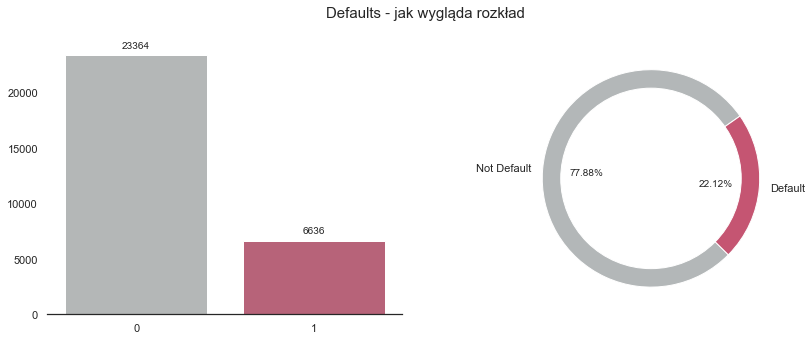

In [21]:
f,ax = plt.subplots(1,2,figsize=(14,5))
fig1 = sns.barplot(y='DEFAULT', x=counts_pct(category='DEFAULT',data=data).index 
                   ,data= counts_pct(category='DEFAULT',data=data)
                  ,palette=['#b3b7b8','#c55572'],ax=ax[0])
fig1.set_ylabel('');
annotate(fig1,s="%.0f",suffix='')
despine()

my_circle=plt.Circle( (0,0), 0.83, color='white')
names=['Not Default','Default']
size=data['DEFAULT'].value_counts().tolist()
plt.pie(size, labels=names, colors=['#b3b7b8','#c55572'],autopct='%1.2f%%',startangle=35)
p=plt.gcf()
p.gca().add_artist(my_circle);
plt.setp(plt.gcf().get_axes(), xlabel='', ylabel='');
plt.suptitle('Defaults - jak wygląda rozkład', fontsize=15);

In [22]:
data.groupby(['AGE_GROUP'])['DEFAULT'].describe()

,count,mean,std,min,25%,50%,75%,max
AGE_GROUP,,,,,,,,
young,21659.000,0.215,0.410,0.000,0.000,0.000,0.000,1.000
middle,7430.000,0.236,0.425,0.000,0.000,0.000,0.000,1.000
old,829.000,0.264,0.441,0.000,0.000,0.000,1.000,1.000
very old,15.000,0.333,0.488,0.000,0.000,0.000,1.000,1.000


In [23]:
cross_pct(c1='AGE_GROUP', c2='DEFAULT')

DEFAULT,0,1,DEFAULT %
AGE_GROUP,,,
young,17013,4646,21.451
middle,5678,1752,23.580
old,610,219,26.417
very old,10,5,33.333


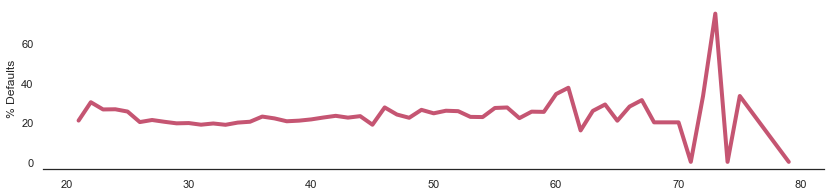

In [24]:
f,ax = plt.subplots(1,1,figsize=(14,3))
sns.lineplot(y='DEFAULT %',x='AGE',data=cross_pct(c1='AGE', c2='DEFAULT').reset_index(),color='#c55572',linewidth=4)
despine()
plt.ylabel('% Defaults');

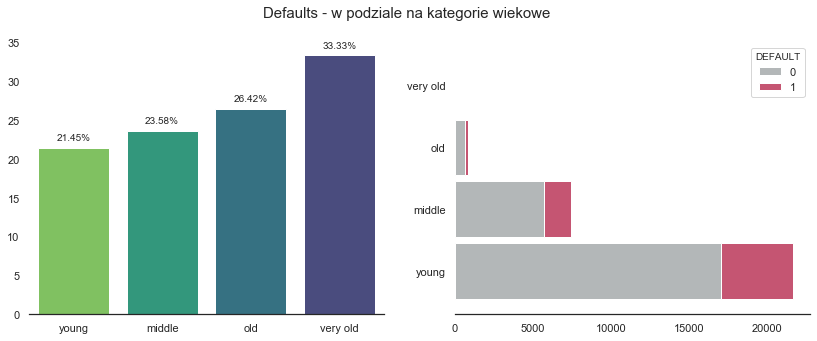

In [25]:
f,ax = plt.subplots(1,2,figsize=(14,5))
t1  = cross_pct(c1='AGE_GROUP', c2='DEFAULT').reset_index()
fig2 = sns.barplot(x=t1['AGE_GROUP'],y=t1['DEFAULT %'],ax=ax[0], palette='viridis_r')
fig2.set_xlabel('');
fig2.set_ylabel('');
fig2b = pd.crosstab(data['AGE_GROUP'], data['DEFAULT']).plot(kind='barh',stacked=True, color =['#b3b7b8','#c55572'], width=0.9,ax=ax[1])
annotate(fig2,s="%.2f",suffix='%')
despine()
plt.suptitle('Defaults - w podziale na kategorie wiekowe', fontsize=15);

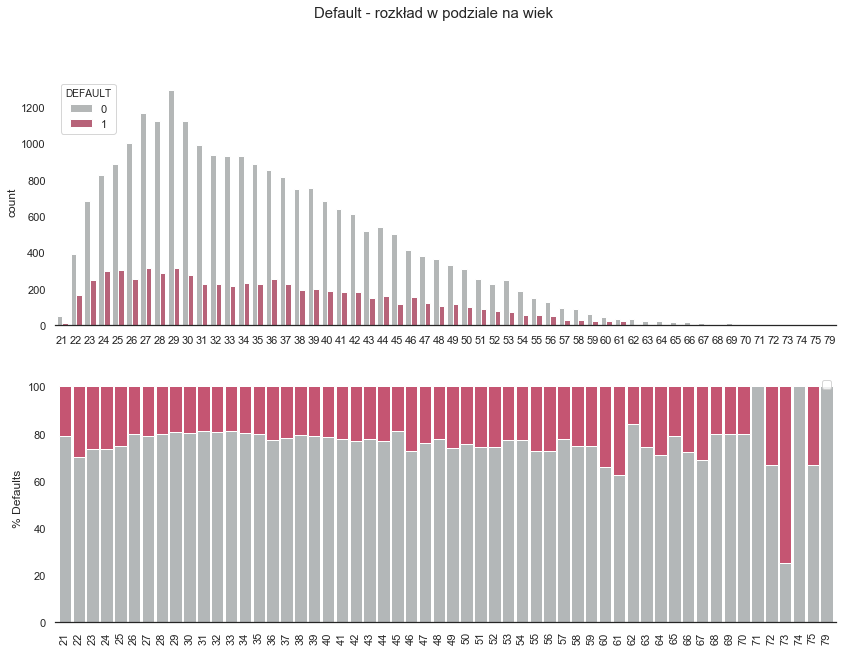

In [26]:
f,ax = plt.subplots(2,1,figsize=(14,10))
t2 = cross_pct(c1='AGE', c2='DEFAULT').reset_index()
#fig4 = pd.crosstab(data['AGE'], data['DEFAULT']).plot(kind='bar',stacked=True, color =['#b3b7b8','#c55572'], width=0.9,ax=ax[0])
fig4 = sns.countplot(x = 'AGE', data = data, hue = 'DEFAULT',palette=['#b3b7b8','#c55572'],ax=ax[0])
fig4.set_xlabel('');
despine()
t2['NOT DEFAULT%'] = 100 - t2['DEFAULT %']
fig5 = t2[['AGE','NOT DEFAULT%','DEFAULT %']].plot(x='AGE',kind='bar',stacked=True, color =['#b3b7b8','#c55572'], width=0.9,ax=ax[1]);
fig5.set_ylabel('% Defaults');
fig5.set_xlabel('');
fig5.legend('');
plt.suptitle('Default - rozkład w podziale na wiek',fontsize=15);

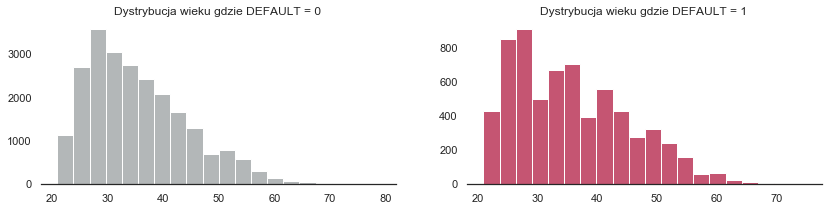

In [27]:
f,ax = plt.subplots(1,2,figsize=(14,3))
fig6 = data[data['DEFAULT']==0]['AGE'].hist(bins=20,ax=ax[0],color='#b3b7b8',grid=False);
fig6.set_title('Dystrybucja wieku gdzie DEFAULT = 0 ');
fig6b = data[data['DEFAULT']==1]['AGE'].hist(bins=20,ax=ax[1],color='#c55572',grid=False);
fig6b.set_title('Dystrybucja wieku gdzie DEFAULT = 1 ');
despine()

Z powyższych wykresów możemy zauważyć kilka istotnych faktów:   
    Najliczniejsza grupa klientów, są to osoby poniżej 30 roku życia  
    Największa ilość Defaultów w ujęciu procentowym dotyczy starszych osób.  
    Prawdopodobienstwo defaultu spada wraz z wiekiem do 30, a pózniej powoli rośnie.  

In [68]:
counts_pct(category='SEX_NAME',data=data)

,SEX_NAME,SEX_NAME %
Female,18112,60.373
Male,11888,39.627


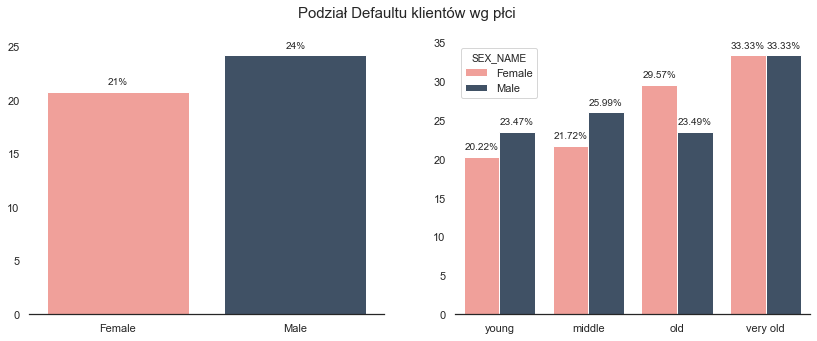

In [29]:
f,ax = plt.subplots(1,2,figsize=(14,5))

fig7 = sns.barplot(y='DEFAULT %', x= 'SEX_NAME'
                   ,data= cross_pct(c1='SEX_NAME', c2='DEFAULT').reset_index()
                  ,palette=['#FE938C','#3A506B'],ax=ax[0])
fig7.set_ylabel('');
annotate(fig7,s="%.0f",suffix='%')
despine()
sa_d = data.groupby(['SEX_NAME','AGE_GROUP'])['DEFAULT'].agg(['mean']).reset_index()
sa_d['mean']=sa_d.loc[:,'mean'] * 100
fig8 = sns.barplot(hue='SEX_NAME',y='mean',x='AGE_GROUP',data=sa_d,palette=['#FE938C','#3A506B'],ax=ax[1])
plt.setp(plt.gcf().get_axes(), xlabel='', ylabel='');
annotate(fig8,s="%.2f",suffix='%')
plt.suptitle('Podział Defaultu klientów wg płci', fontsize=15);

In [30]:
data.groupby(['SEX_NAME','AGE_GROUP'])['DEFAULT'].agg(['count','mean'])

count  mean
SEX_NAME AGE_GROUP             
Female   young      13475 0.202
         middle      4186 0.217
         old          399 0.296
         very old       6 0.333
Male     young       8184 0.235
         middle      3244 0.260
         old          430 0.235
         very old       9 0.333

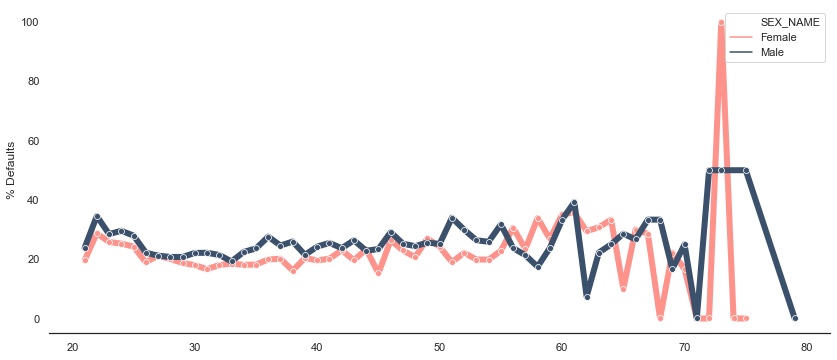

In [72]:
d_s = data.groupby(['SEX_NAME','AGE'])['DEFAULT'].agg(['mean']).reset_index()
d_s.rename(columns={'mean':'DEFAULT %'},inplace=True)
d_s['DEFAULT %'] = d_s['DEFAULT %']*100
f,ax = plt.subplots(1,1,figsize=(14,6))
sns.lineplot(y='DEFAULT %',x='AGE',hue='SEX_NAME',data=d_s,palette=['#FE938C','#3A506B'],linewidth=6,marker="o")
despine()
plt.ylabel('% Defaults');

Na podstawie powyższych wykresów i tabel widzimy, że kobiet stanowią 60% klientów. Pomimo tego widzimy, że w przypadków mężczyzn mamy doczynienia z większą ilością Defaultów. Patrząc na wiek i płeć klientów. Widzimy, że do około 55 roku życia większy % Defaultów mamy u mężczyzn. Zmiana następuje w przypadku naszej kategorii osób "Old" czyli przedziału wiekowego od 55 - 70 lat. Czyli możemy przyjąć, że prawdopodobieństwo defaultu w przypadku mężczyzny jest większe.

In [73]:
cross_pct(c1='EDUCATION_GROUP', c2='DEFAULT')

DEFAULT,0,1,DEFAULT %
EDUCATION_GROUP,,,
graduate school,8549,2036,19.235
high school,3680,1237,25.158
others,435,33,7.051
university,10700,3330,23.735


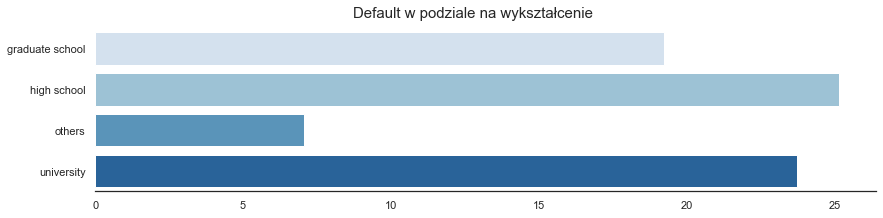

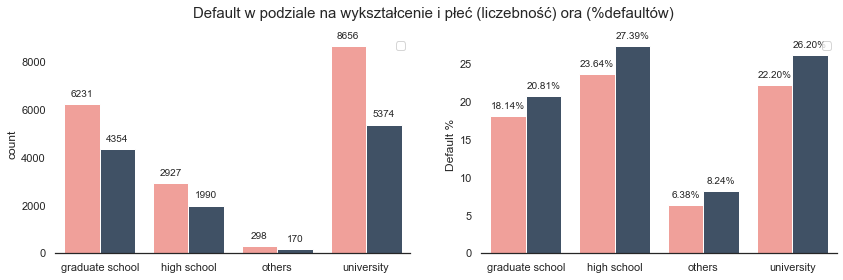

In [113]:
s_e = data.groupby(['SEX_NAME','EDUCATION_GROUP'])['DEFAULT'].agg(['count','mean']).reset_index()
s_e['mean'] = s_e['mean'] * 100
s_e.rename(columns={'mean':'DEFAULT %'},inplace=True)
f,ax = plt.subplots(1,1,figsize=(14,3))
fig9a = sns.barplot(x='DEFAULT %', y= 'EDUCATION_GROUP'
                   ,data= cross_pct(c1='EDUCATION_GROUP', c2='DEFAULT').reset_index()
                  ,palette='Blues')
despine()
plt.suptitle('Default w podziale na wykształcenie',fontsize=15);

f,ax = plt.subplots(1,2,figsize=(14,4))
fig9 = sns.barplot(y='DEFAULT %',x='EDUCATION_GROUP',hue='SEX_NAME',data=s_e,palette=['#FE938C','#3A506B'],ax=ax[1]);
fig9.legend('')
fig9b = sns.barplot(y='count',x='EDUCATION_GROUP',hue='SEX_NAME',data=s_e,palette=['#FE938C','#3A506B'],ax=ax[0]);
fig9b.legend('')
despine()
fig9b.set_xlabel('')
fig9.set_ylabel('Default %')
annotate(fig9,s="%.2f",suffix='%')
annotate(fig9b,s="%.0f",suffix='')
plt.suptitle('Default w podziale na wykształcenie i płeć (liczebność) ora (%defaultów)',fontsize=15);

Widzimy, ze klienci z wyższym stopniem edukacji mają niższy procent defaultów. Większość klientów ma stopień naukowy "graduate school" oraz "university". Widzimy również, że w przypadku każdej kategorii edukacyjnej mężczyźni mają większy procent prawdopodobieństwa defaultu w nastepnym miesiącu. Największe prawdopodobieństwo defaultu dotyczy klientów z wykształceniem średnim. Możemy więc przyjąć, że im niższy poziom wykształcenia tym wyższe prawdopodobieństwo defaultu.